<H1 style="font-size:50px">11: Metodo Monte Carlo</H1>

<hr>

## 1.1 Introduzione

Il termine Metodo Monte Carlo si riferisce a un insieme di tecniche di calcolo e simulazione che si basano sull'uso di numeri casuali.

## 1.2 Integrazione numerica con metodo MC

L'idea di usare numeri casuali per calcolare un integrale numerico si basa sul teorema della media in Analisi che afferma che l'integrale  $\int_a^b f(x)\,dx$ è uguale al prodotto della lunghezza (con segno) dell'intervallo di integrazione $(b-a)$ per il valor medio della funzione $f$, $<f>$, nell'intervallo. Il valor medio pu&ograve; essere calcolato
facendo la media dei valori di $f$ in un set di punti scelti a caso in $[a,b]$.<BR>
Esempio: $\int_1^2 x^2 dx = \frac{7}{3}$<BR>   

In [1]:
import numpy as np
from numpy.random import default_rng

rng = default_rng()

npoints=10
xval=rng.uniform(size=npoints)+1.   #punti casuali in [1,2]
#print(xval)

y_ave=np.mean(xval*xval)
my_int=y_ave*(2.-1.)
print("Stima dell'integrale:",my_int)
print("Risultato esatto:",7/3)

Stima dell'integrale: 2.6155133014439764
Risultato esatto: 2.3333333333333335


Aumentiamo il numero di punti per ottenere una maggiore accuratezza:

In [24]:
npoints=100
xval=rng.uniform(size=npoints)+1.   #punti casuali in [1,2]
#print(xval)

y_ave=np.mean(xval*xval)
my_int=y_ave*(2.-1.)
print("Stima dell'integrale:",my_int)
print("Risultato esatto:",7/3)

Stima dell'integrale: 2.2300646377312843
Risultato esatto: 2.3333333333333335


Aumentiamo ancora il numero di punti:

In [30]:
npoints=1000
xval=rng.uniform(size=npoints)+1.   #punti casuali in [1,2]
#print(xval)

y_ave=np.mean(xval*xval)
my_int=y_ave*(2.-1.)
print("Stima dell'integrale:",my_int)
print("Risultato esatto:",7/3)

Stima dell'integrale: 2.3142078477545596
Risultato esatto: 2.3333333333333335


<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    
<OL>
<LI>Confrontate il risultato con quello fornito dal metodo dei trapezi e da `quad` nel notebook 10_scipy.</LI>
</OL>
</div>

Esempio in più dimensioni: il volume di una semisfera di raggio 1: 
$$\int_{-1}^1 dx \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}}dy\,\sqrt{1-x^2-y^2} = \frac{2}{3}\pi$$

In [33]:
#npoints = 100
npoints = 10000
xval=2*rng.uniform(size=npoints)-1.
#print(xval)
yval=2*rng.uniform(size=npoints)-1.
#print(yval)
points=[pair for pair in zip(xval,yval) if pair[0]**2 + pair[1]**2 < 1.] #zip returns tuples
points=np.array(points)
#type(points)
#len(points)
#print(points)

In [34]:
def my_f(point):
    return np.sqrt(1.- (point*point).sum(axis=1)).mean()

base_area=np.pi
print("Stima dell'integrale:",base_area*my_f(points))
print("Risultato esatto:",2/3*np.pi)

Stima dell'integrale: 2.099909570041918
Risultato esatto: 2.0943951023931953


Il grande vantaggio del metodo Monte Carlo &egrave; che si pu&ograve; estendere immediatamente a qualunque numero di dimensioni mentre non &egrave; possibile fare altrettanto con altri metodi.

## 1.3 Generazione di eventi distribuiti secondo una densit&agrave; di probabilit&agrave; fissata

### 1.3.1 Metodo hit and miss


Supponiamo di avere la seguente distribuzione di probabilit&agrave;:
$$P(x) = \begin{cases} 0.6 \quad x<0.5\\ 1.4 \quad x>0.5 \end{cases}$$

<div style= 'padding:20px 20px 20px 150px;'>
  <img src="../Images/stepprobability.png" width="300" />
</div>

e di voler generare valori di $x$ distribuiti secondo $P(x)$

Procediamo nel modo seguente:

- Troviamo un numero $Y$ tale che $P(x) < Y, \,\forall x$. Nel nostro caso potremmo prendere, per esempio, $Y = 2$.  
- Generiamo un numero casuale $x_0$ in [0,1], in modo uniforme.
- Generiamo un secondo numero casuale $y_0$ in [0,$Y$]
- Teniamo il numero $x_0$ nel sample di valori se $y_0 < P(x_0)$ altrimenti lo scartiamo e generiamo un nuovo valore $x_0$.

La probabilit&agrave; di tenere un punto nel bin di sinistra &egrave;:
$$P_{sx}=P(x < 0.5)\cdot P(y < 0.6) = 0.5\cdot\frac{0.6}{2}$$
La probabilit&agrave; di tenere un punto nel bin di destra &egrave;:
$$P_{dx}=P(x > 0.5)\cdot P(y < 1.7) = 0.5\cdot\frac{1.4}{2}$$
Quindi il rapporto $R$ fra le due probabilit&agrave;, ovvero il rapporto fra il numero di punti accettati in $x < 0.5$ e il numero di punti accettati in $x > 0.5$ &egrave;, come deve:
$$ R = \frac{P_{sx}}{P_{dx}} = \frac{0.6}{1.4}$$

In [6]:
npoints=1000
#npoints = 1000000
xval=rng.uniform(size=npoints)
# Separo i valori della coordinata x che cadono nel primo bin da quelli che cadono nel secondo (minori/maggiori di 0.5).
x1val=[x for x in xval if x < 0.5]
x2val=[x for x in xval if x > 0.5]

# Altezza della distribuzione nei due bin
y1=0.6
y2=1.4

# Per ogni coordinata x genero un numero casuale in [0,2] che rappresenta la corrispondente coordinata y.
# Tengo il punto se cade al di sotto della curva della distribuzione, altrimenti lo scarto.
# Il numero di punto accettati nei due bin, nel limite di un numero molto grande di punti,sono y1/2 e y2/2.
x1val=[x for x in x1val if y1 > rng.uniform()*2]
x2val=[x for x in x2val if y2 > rng.uniform()*2]

print("Numero di punti in [0,0.5]:",len(x1val))
print("Numero di punti in [0.5,1]:",len(x2val))
print("rapporto fra i numeri di punti:",len(x2val)/len(x1val),"rapporto atteso=7/3:",7/3)

Numero di punti in [0,0.5]: 156
Numero di punti in [0.5,1]: 347
rapporto fra i numeri di punti: 2.2243589743589745 rapporto atteso=7/3: 2.3333333333333335


### 1.3.2 Test della generazione Monte Carlo di punti secondo una distribuzione data

#### Una funzione generica per generare eventi secondo una distribuzione qualsiasi

In [7]:
import numpy as np

def generate_f(f,a,b,max_f):
    '''
    Generate random points distributed according to an input distribution
    Input:
    f: the probability distribution
    a,b: extrema of the range for the desired random number
    max_f: a real number such that f(x) < max_f for each x
    Returns:
    ranval: random number
    '''
    not_found=True
    while not_found:
        x=rng.uniform(a,b)
        y=rng.uniform(0,max_f)
        if f(x)>y:
            not_found=False
    
    return x
    

#### Esempio 1

In [18]:
def f1(x):
    if x < 0.5:
        val=0.6
    else:
        val=1.4
    
    return val
    

In [24]:
#npoints=1000
npoints = 1000000
xval = [generate_f(f1,0,1,2) for n in range(npoints)]
x1val=[x for x in xval if x < 0.5]
x2val=[x for x in xval if x > 0.5]

print("Numero di punti in [0,0.5]:",len(x1val))
print("Numero di punti in [0.5,1]:",len(x2val))
print("rapporto fra i numeri di punti:",len(x2val)/len(x1val),"rapporto atteso=7/3:",7/3)

Numero di punti in [0,0.5]: 299573
Numero di punti in [0.5,1]: 700427
rapporto fra i numeri di punti: 2.3380845403290684 rapporto atteso=7/3: 2.3333333333333335


Facciamo l'istogramma normalizzato delle frequenze di `xval`: 

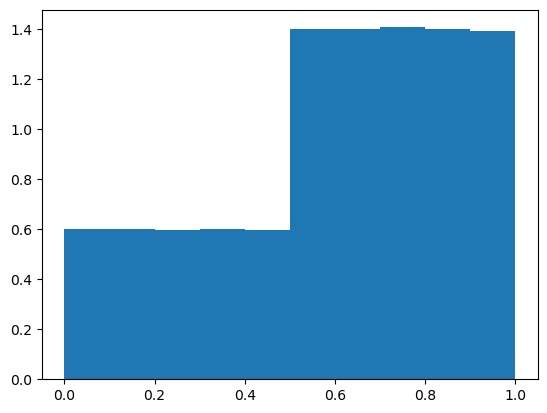

In [27]:
import matplotlib.pyplot as plt
nbins = 10
xrange = (0,1)

fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(xval, nbins, range=xrange, density=True)

#### Esempio 2

In [9]:
def f2(x):
    val=3./8.*(1+x**2)
    
    return val    

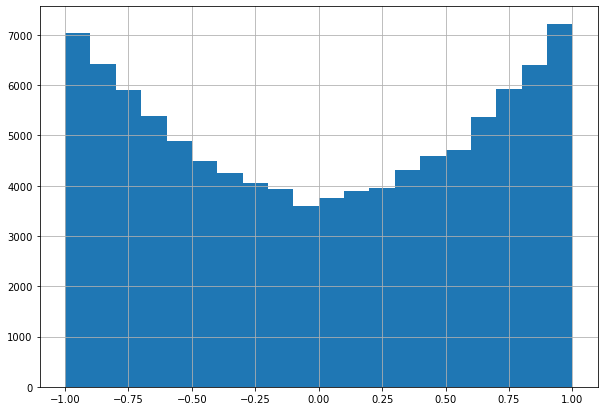

In [11]:
#npoints=1000
npoints = 100000
xval = [generate_f(f2,-1,1,1) for n in range(npoints)]

nbins = 20
xrange = (-1,1)

fig, ax = plt.subplots(figsize=(10,7))
nevent, bins, patches = ax.hist(xval, nbins, range=xrange)
ax.grid(True)

## 1.4 Propagazione dell'errore con metodo MC

Supponiamo di aver fatto un esperimento per misurare l'accelerazione di gravit&agrave; $g$ misurando il periodo $T$ di oscillazione di un pendolo di lunghezza variabile $L$. Sappiamo che:
$$ T = 2 \pi \sqrt{\frac{L}{g}} \quad \rightarrow \quad g = \frac{ 4 \pi^2 L}{T^2}$$
Supponiamo di aver misurato $L = 1.000 \pm 0.004\, m$, $T = 2.000 \pm 0.005\, s$ e che le misure siano distribuite gaussianamente.
Per la propagazine degli errori ci servono:
$$ \frac{\partial g}{\partial T} = \frac{ - 8 \pi^2 L}{T^3},\qquad  \frac{\partial g}{\partial L} = \frac{ 4 \pi^2}{T^2}$$

$$ \sigma_g = \sqrt{\left. \sigma_T \, \frac{\partial g}{\partial T}\right|^2_{\overline{T},\overline{L}} +
\left. \sigma_L \, \frac{\partial g}{\partial L}\right|^2_{\overline{T},\overline{L}}
}$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def g(L,T):
    return 4*np.pi**2*L/T**2

def g_err(L,L_err,T,T_err):
    return 4*np.pi**2/T**2*np.sqrt(4*(L/T*T_err)**2 + L_err**2)

L_mean =1.0
L_err = 0.004
T_mean = 2.0
T_err = 0.005

g_m = g(L_mean,T_mean)
g_e = g_err(L_mean,L_err,T_mean,T_err)
print(f"g_exp = {g_m} +\- {g_e}")

g_exp = 9.869604401089358 +\- 0.06319630315448918


Per valutare l'errore su $g$ con il metodo Monte Carlo generiamo 1000 valori per L e 1000 per T da distribuzioni gaussiane con i rispettivi valori medi e deviazioni standard. Calcoliamo i corrispondenti valori di $g$ e valutiamo il valor medio e la deviazione standard della distribuzione ottenuta.

In [20]:
npoints = 1000
T_test = rng.normal(T_mean,T_err,npoints)
L_test = rng.normal(L_mean,L_err,npoints)
g_test = g(L_test,T_test)
g_m1 = g_test.mean()
g_e1 = g_test.std()
print(f"g_MC = {g_m1} +\- {g_e1}")

g_MC = 9.867338107189237 +\- 0.06329906777231029


### 1.4.1 Plot di controllo

Nota sulle normalizzazioni:<BR>
    - Dato un istogramma con $N_{tot}$ valori, i valori in ciascun bin sommano a $N_{tot}$.    
    - Se si vuole sovrapporre una gaussiana $g(x)$ all'istogramma bisogna ricordare che: $\int g(x)\,dx = \sum_i g(x_i) w =1$, dove $w$ è la larghezza di ciascun bin. Di conseguenza i valori di $g(x)$ vanno moltiplicati per $w \cdot N_{tot}$ per avere un confronto significativo.

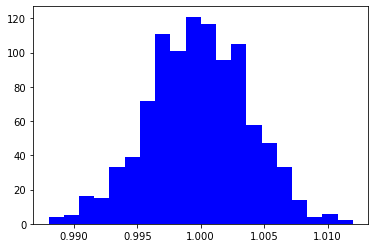

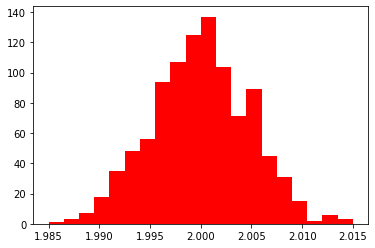

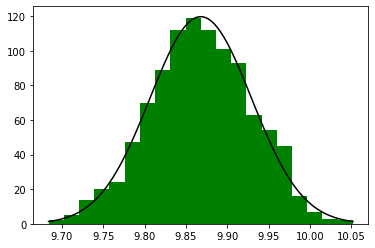

In [68]:
def Gauss_dist(t,lam,sigma):
    return np.exp(-0.5*((t-lam)/sigma)**2)/np.sqrt(2*np.pi)/sigma

fig1, ax1 = plt.subplots()

nbins = 20
range1 = (L_mean - 3*L_err,L_mean + 3*L_err)
ax1.hist(L_test,nbins,range1,color='b',label='L');

fig2, ax2 = plt.subplots()

nbins = 20
range2 = (T_mean - 3*T_err,T_mean + 3*T_err)
ax2.hist(T_test,nbins,range2,color='r',label='T');


fig3, ax3 = plt.subplots()

nbins = 20
range3 = (g_m1 - 3*g_e1,g_m1 + 3*g_e1)
binwidth = 6*g_e1/nbins

ax3.hist(g_test,nbins,range3,color='g',label='g');

t = np.linspace(g_m1 - 3*g_e1,g_m1 + 3*g_e1,100)
yval = Gauss_dist(t,g_m1,g_e1)*npoints*binwidth
#yval = np.array([np.exp(-0.5*((t1-g_m1)/g_e1)**2)/np.sqrt(2*np.pi)/g_e1 for t1 in t])
#print(yval)

ax3.plot(t,yval,c='k')


## 1.5 Simulazione di eventi complessi con metodo MC 1

Il metodo Monte Carlo pu&ograve; essere utilizzato per simulare numericamente situazioni in cui le variabili rilevanti sono affette da incertezze.

L'esempio che segue, che mi sembra illuminante, &egrave; tratto da un articolo di Robert Kwiatkowski[https://medium.com/data-science/monte-carlo-simulation-a-practical-guide-85da45597f0e](https://medium.com/data-science/monte-carlo-simulation-a-practical-guide-85da45597f0e)

Per procedere &egrave; necessario:

- Identificare tutti gli elementi che contribuiscono al processo e come interagiscono, ad esempio: si sommano o si sottraggono?
- Identificare sperimentalmente i parametri delle distribuzioni di probabilit&agrave; che descrivono ciascun elemento.
- Campionare da ciascuna delle distribuzioni e combinare i risultati ottenendo l'esito finale di una singola iterazione.
- Ripetere la procedura un numero sufficiente di volte, tipicamente fino a quando la distribuzione dei risultati finale &egrave; stabile rispetto al numero di ripetizioni.

Durante l’esecuzione di questa simulazione, il parametro risultante converger&agrave; verso la distribuzione normale, anche se le distribuzioni di origine possono essere diverse. Questo &egrave; l’effetto del Teorema del limite centrale ed &egrave; uno dei motivi per cui questa tecnica &egrave; diventata immensamente popolare in vari settori.

In questo esempio assumiamo di voler assemblare tre blocchi all’interno di un contenitore di una determinata larghezza. Le dimensioni nominali dei diversi elementi, in millimetri, sono riportate nell’immagine sottostante. Vediamo che da progetto c’&egrave; uno spazio nominale disponibile di 0,5 mm.

<div style= 'padding:20px 20px 20px 150px;'>
  <img src="../Images/Kwiatkowski_1.webp" width="500" />
</div>


Tuttavia, le dimensioni reali dei tre blocchi e del un contenitore possono variare per imprecisioni nella procedura di costruzione. A scopo dimostrativo, assumiamo che nessuna di queste variazioni segua la distribuzione normale. I tre blocchi seguiranno le distribuzioni triangolari illustrate nella figura mentre le dimensioni del contenitore seguiranno una distribuzione uniforme in un intervallo di +/-0,1 mm
rispetto alle dimensioni nominali.


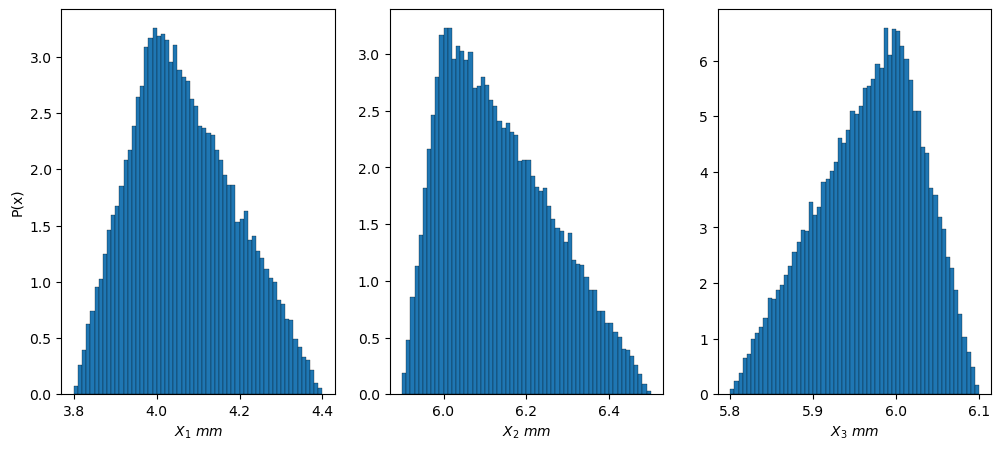

In [31]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

rng = default_rng()

sample = 50000
dist1 = rng.triangular(3.8, 4.0, 4.4,sample)
dist2 = rng.triangular(5.9, 6.0, 6.5,sample)
dist3 = rng.triangular(5.8, 6.0, 6.1,sample)

nbins = 60
xrange1 = (3.8, 4.4)
xrange2 = (5.9, 6.5)
xrange3 = (5.8, 6.1)

linw = 0.2

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12, 5))
nevent1, bins1, patches1 = ax1.hist(dist1, nbins, range=xrange1, edgecolor = "black", linewidth = linw, density=True)
nevent2, bins2, patches2 = ax2.hist(dist2, nbins, range=xrange2, edgecolor = "black", linewidth = linw, density=True)
nevent3, bins3, patches3 = ax3.hist(dist3, nbins, range=xrange3, edgecolor = "black", linewidth = linw, density=True)

ax1.set_ylabel('P(x)')
ax1.set_xlabel(r"$X_1\,\,mm$")
ax2.set_xlabel(r"$X_2\,\,mm$")
ax3.set_xlabel(r"$X_3\,\,mm$");

Ora, calcolando semplicemente i valori estremi, possiamo vedere che nello scenario peggiore la somma delle lunghezze dei  blocchi pu&ograve; arrivare a 17 mm e mentre il contenitore pu&ograve; avere una larghezza di soli 16,4 mm. In questo caso, non possiamo inserire tutti i blocchi all'interno del contenitore.

La domanda &egrave; : qual &egrave;  la probabilit&agrave;  di non riuscire a inserire tutti i blocchi in un contenitore?

Lo spazio residuo all'interno del contenitore sar&agrave;  `Y = X4 – X1 – X2 – X3`. Se `Y` &egrave; negativo non i blocchi non potranno essere inseriti nel contenitore. 


 [False  True False False False False False False False False False False
 False False False False False False  True False False False False False
 False  True False False False False] 

Probabilità di fallimento: 5.401%


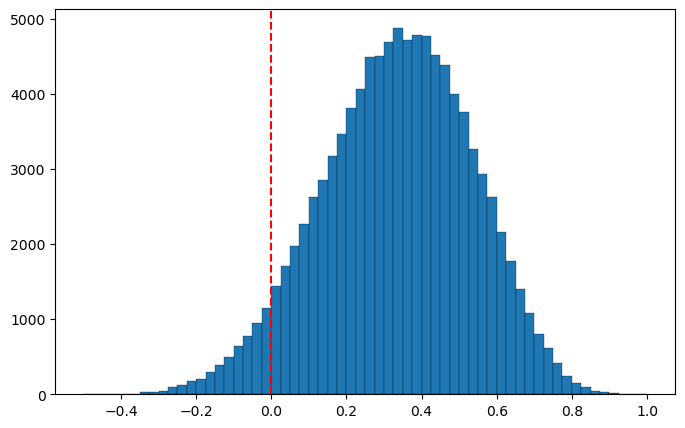

In [36]:
import numpy as np
from numpy.random import default_rng

rng = default_rng()

s = 100000 # numero di campioni
limit = 0 # valore minimo dello spazio residuo

# componenti. rng restituisce degli nd.array.
component_1 = rng.triangular(3.8, 4.0, 4.4,s)
component_2 = rng.triangular(5.9, 6.0, 6.5,s)
component_3 = rng.triangular(5.8, 6.0, 6.1,s)
component_4 = rng.uniform(16.4, 16.6, s)

# combiniamo i risultati
total = component_4 - component_1 - component_2 - component_3

# selezioniamo gli eventi per cui total è minore di zero
fails = total < limit
print("\n",fails[0:30],"\n")

# True vale 1 mentre False vale zero. Trovo quindi il numero di True facendo la somma degli elementi di fails
# Trovo la percentuale di fallimenti dividendo per il numero totale di evento e moltiplicando per 100
probability = np.sum(fails)/len(total)*100

print(f"Probabilità di fallimento: {probability}%")

fig2, ax4 = plt.subplots(figsize=(8, 5))
xrange2 = (-0.5, 1.0)
nevent, bins, patches = ax4.hist(total, nbins, range=xrange2, edgecolor = "black", linewidth = linw)

# Usando ``transform=vax.get_xaxis_transform()`` le coordinate y vengono scalate
# in modo che 0 corrisponda all'estremo inferiore degli Axes and 1 all'estremo superiore.
ax4.vlines(0, 0, 1, transform=ax4.get_xaxis_transform(), linestyle='dashed', colors='r');


## 1.6 Simulazione di eventi complessi con metodo MC 2

Il metodo Monte Carlo pu&ograve; essere utilizzato per simulare numericamente processi
complessi in cui ogni passo &egrave; governato da una distribuzione di probabilit&agrave;.<BR>

Prendiamo come esempio un gioco di dadi chiamato `Craps` che si svolge come segue:
- Il giocatore fa la propria puntata e poi getta due dadi.
- Se la somma dei punteggi &egrave; 7 oppure 11, il giocatore vince e gli viene restituito il doppio della propria puntata.
- Se la somma dei punteggi &egrave; 2, 3 oppure 12, il giocatore perde la propria puntata.
- In tutti gli altri casi, il giocatore tira nuovamente i dadi finch&egrave; non si realizza il punteggio realizzato al primo lancio (il giocatore vince) oppure 7 (il giocatore perde).

Vogliamo stabilire la probabilit&agrave; che un giocatore ha di vincere o di perdere denaro in una partita composta di molte mani di `Craps` e la distribuzione di probabilit&agrave; delle vincite e perdite.

Ogni dado ha probabilit&agrave; 1/6 di mostrare un numero qualsiasi fra 1 e 6.
Le probabilit&agrave; dei punteggi nel lancio di due dadi sono:
-    P(2) = P(12) = 1/36
-    P(3) = P(11) = 2/36
-    P(4) = P(10) = 3/36
-    P(5) = P(9)  = 4/36
-    P(6) = P(8)  = 5/36
-    P(7)         = 6/36

Costruiamo una funzione che simuli una mano di `Craps`

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng

rng = default_rng()

def craps_once():
    '''
    Il giocatore getta due dadi.
    Se la somma dei punteggi &egrave; 7 oppure 11, il giocatore vince e riceve la propria puntata raddoppiata
    Se la somma dei punteggi &egrave; 2, 3 oppure 12, il giocatore perde la propria puntata.
    In tutti gli altri casi si tirano nuovamente i dadi finch&egrave; non si realizza il punteggio iniziale
    (il giocatore vince) oppure 7 (il giocatore perde).
    La funzione restituisce `True` in caso di vittoria del giocatore, `False` in caso contrario.
    '''
    # Primo lancio
    first_roll = rng.integers(1,high=7,size=2)
    #print(first_roll)
    first = sum(first_roll)
    #print(first)
    # Risultato oppure lanci successivi
    if(first in [7,11]):
        return True
    elif(first in [2,3,12]):
        return False
    else:
        # Lanci successivi. Il loop infinito è interrotto dal return
        # se il lancio totalizza il valore del primo lancio (True -> vincita) oppure 7 (False -> perdita)
        while(True):
            roll = sum(rng.integers(1,high=7,size=2))
            #print('++',roll,'++')
            if(roll==first):
                return True
            elif(roll==7):
                return False
            
    
craps_once()

False

Stimiamo la probabilit&agrave; del giocatore di vincere la mano, calcolando la frazione di vittorie su un dato numero (grande) di mani.

In [59]:
def craps_probability(n):
    '''
    Stima la probabilità di vincere una mano di Craps
    calcolando la frazione di vittorie su n tentativi.
    La stima varia casualmente ad ogni run, attorno al
    risultato esatto &egrave; 244/495 ≈ 0.492929
    '''
    nwin = 0
    for i in range(n):
        if(craps_once()):
            nwin += 1
            
    probability = nwin/n
    return probability


n = 10000
craps_probability(n)

0.4949

Valutiamo la distribuzione delle vincita o perdita in una partita di `nhands` mani, simulando
`nsession` partite.

In [62]:
def craps_outcome(nsessions, nhands):
    '''
    Stima la distribuzione di risultati di una partita di craps di nhands mani,
    simulando nsessions partite, ognuna di nhands mani.
    Assumiamo che ad ogni puntata venga scommessa la stessa cifra che possiamo
    considerare come una unità.
    Se il giocatore vince il suo capitale aumenta di una unità.
    Se il giocatore perde il suo capitale diminuisce di una unità.
    Restituisce un array di nsessions elementi con la variazione del capitale iniziale
    in ogni sessione.
    '''
    
    res = np.zeros(nsessions, dtype = int)
    index = 0
    
    for i in range(nsessions):    # loop sulle partite
        capital = 0
        for j in range(nhands):   # loop sulle mani di una partita
            if(craps_once()):
                capital += 1
            else:
                capital -= 1
        res[i] = capital
        
    return res

out = craps_outcome(1000,1000)
#print(out)

Disegnamo il plot delle frequenze.

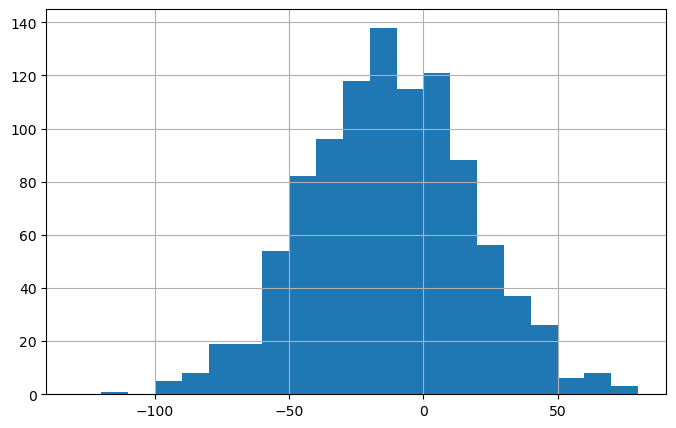

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
min = out.min()
max = out.max()
# cerchiamo estremi più carini
inf = (min//10 -1)*10
sup = (max//10+1)*10
#print(inf,sup)
nbins = (sup - inf)//10

xrange = (float(inf),float(sup))
nevent, bins, patches = ax.hist(out, nbins, range=xrange)
ax.grid()



## Sommario dei concetti principali

### **Concetti Fondamentali del Metodo Monte Carlo**

1. **Integrazione numerica Monte Carlo** (Sezione 1.2)
   - Basata sul teorema del valor medio: l'integrale equivale al prodotto dell'intervallo per il valor medio della funzione
   - La precisione aumenta con il numero di punti casuali utilizzati
   - Vantaggi: facilmente estendibile a dimensioni multiple dove altri metodi diventano impraticabili

2. **Generazione di distribuzioni di probabilit&agrave;** (Sezione 1.3)
   - **Metodo hit-and-miss**: genera punti casuali uniformi e li accetta/rifiuta in base alla distribuzione desiderata
   - Principio: la probabilit&agrave; di accettazione in una regione &egrave; proporzionale al valore della funzione di densit&agrave;

3. **Propagazione degli errori** (Sezione 1.4)
   - Monte Carlo permette di stimare l'incertezza su grandezze derivate senza calcoli analitici complessi
   - Si generano campioni dalle distribuzioni delle variabili di input e si calcola la distribuzione dell'output
   - Il metodo cattura automaticamente correlazioni e non-linearit&agrave;

4. **Simulazione di processi stocastici** (Sezione 1.5)
   - Esempio del gioco Craps: simulazione di eventi sequenziali con regole probabilistiche
   - La legge dei grandi numeri garantisce la convergenza delle stime alle probabilit&agrave; teoriche
   - Permette di studiare sistemi complessi difficili da analizzare analiticamente

### **Principi chiave**
- **Casualit&agrave; controllata**: uso di generatori pseudo-casuali per risultati riproducibili
- **Convergenza statistica**: l'accuratezza migliora proporzionalmente a $\sqrt{n}$ ($n$ = numero di campioni)
- **Versatilit&agrave;**: applicabile a problemi di integrazione, ottimizzazione, e simulazione
- **Trade-off**: richiede molte iterazioni per alta precisione, ma gestisce facilmente problemi multidimensionali
